# _SUPPORT VECTOR MACHINE_

## _Task 1: Exploratory Data Analysis (EDA)_

### 1.	Load the Mushroom dataset and perform fundamental data exploration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\DS_Assignments\Assignment_17-SVM\SVM\mushroom.csv")
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [38]:
df.shape

(2000, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [5]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
# Encode the selected features and the target variable / categericol to numerical
features_to_encode = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'class']
label_encoders = {}

for feature in features_to_encode:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le


### 2.	Utilize histograms, box plots, or density plots to understand feature distributions

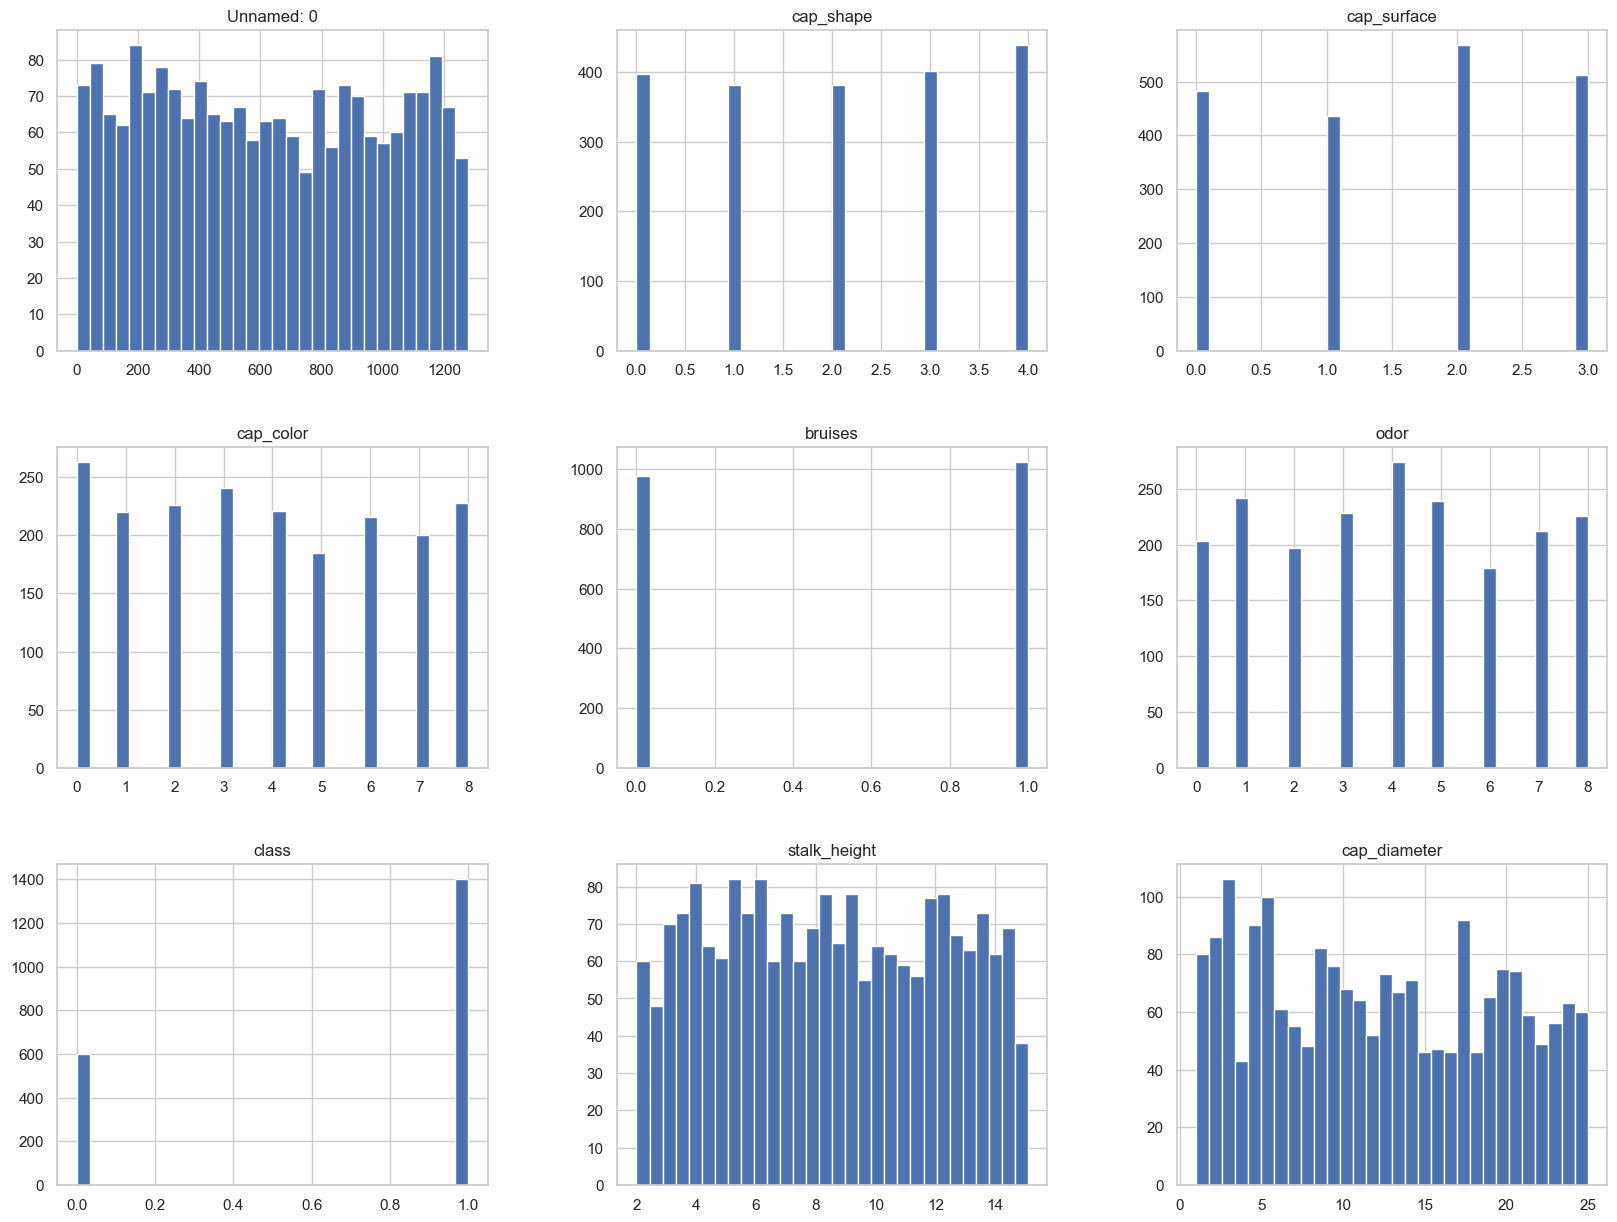

In [7]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for each feature
df.hist(bins=30, figsize=(20,15))
plt.show()

In [8]:
df.boxplot()
plt.show()

### 3.	Investigate feature correlations to discern relationships within the data.

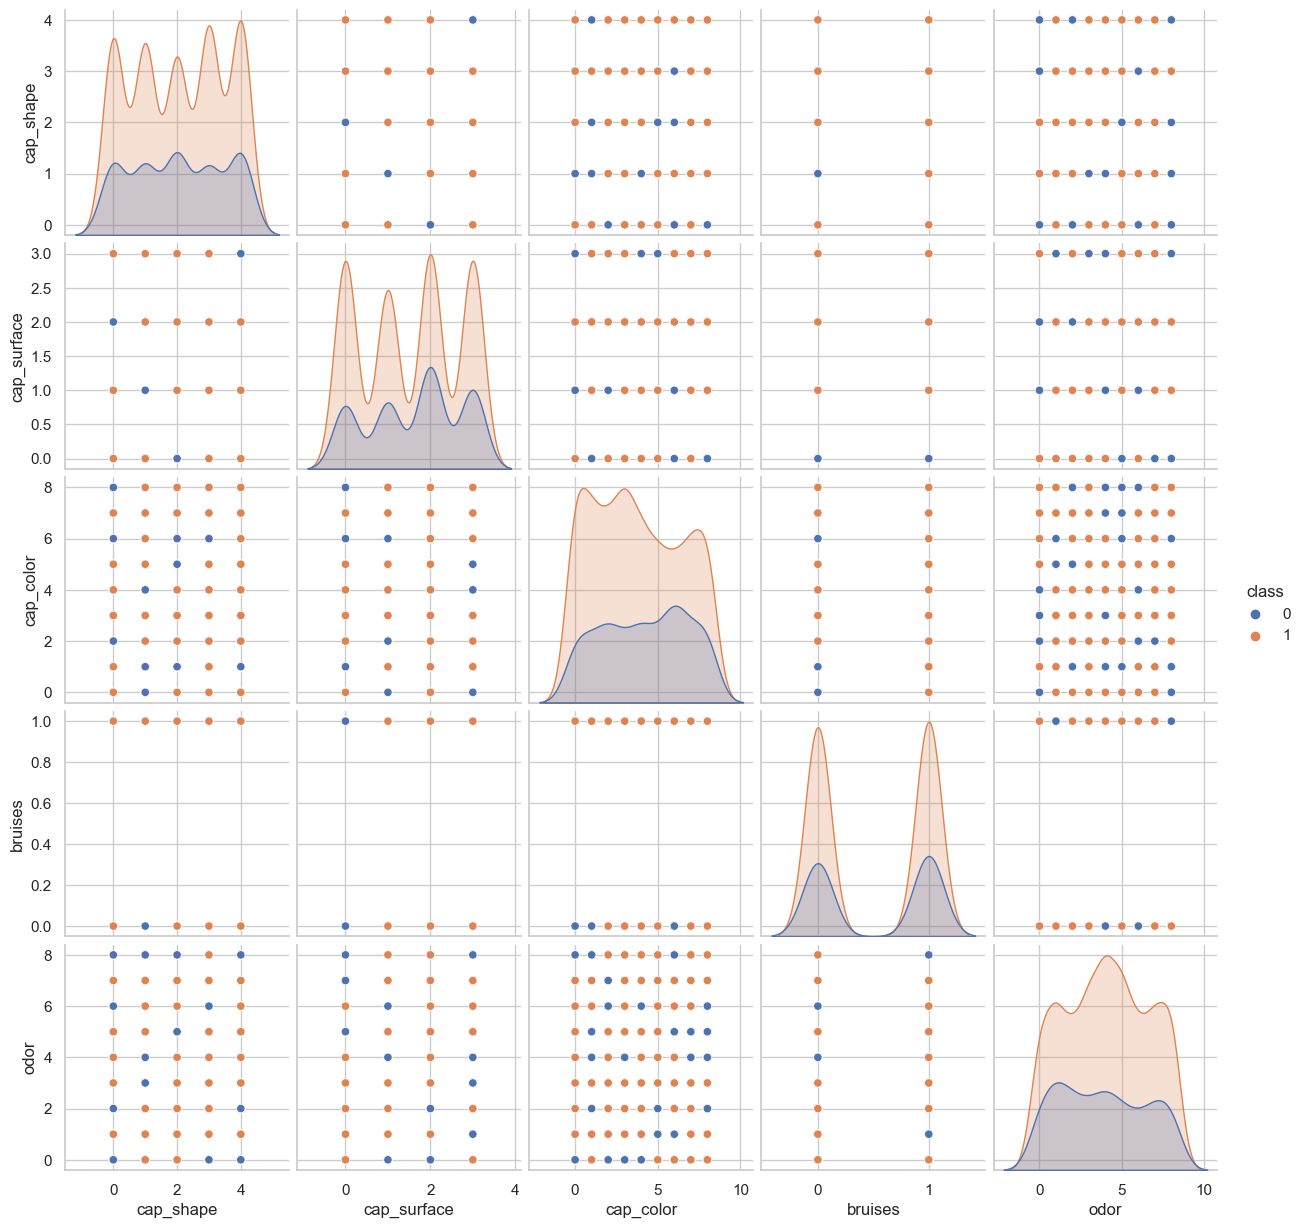

In [9]:
# Display pair plots for selected features
sns.pairplot(df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'class']], hue='class')
plt.show()


## _Task 2: Data Preprocessing_

### 1.	Encode categorical variables if necessary.


In [10]:
df['class'].value_counts()

1    1400
0     600
Name: class, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'class'
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Encode the categorical features using one-hot encoding
mushroom_data_encoded = pd.get_dummies(df, columns=[col for col in df.columns if col != 'class'])

# Display the first few rows of the encoded dataset
mushroom_data_encoded.head()


class  Unnamed: 0_0  Unnamed: 0_1  Unnamed: 0_2  Unnamed: 0_3  \
0      1             0             0             0             0   
1      0             0             0             0             0   
2      1             0             0             0             0   
3      1             0             0             0             0   
4      1             0             0             0             0   

   Unnamed: 0_4  Unnamed: 0_5  Unnamed: 0_8  Unnamed: 0_9  Unnamed: 0_10  ...  \
0             0             0             0             0              0  ...   
1             0             0             0             0              0  ...   
2             0             0             0             0              0  ...   
3             0             0             0             0              0  ...   
4             0             0             0             0              0  ...   

   cap_diameter_24.687267754636736  cap_diameter_24.72272198929874  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   cap_diameter_24.72631002311142  cap_diameter_24.737114865105827  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   cap_diameter_24.786560809529952  cap_diameter_24.85184031275723  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   cap_diameter_24.90662607194244  cap_diameter_24.912770128156826  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   cap_diameter_24.938622172274297  cap_diameter_25.000053842997023  
0                                0                                0  
1                                0                                0  
2                                0                                0  
3                                0                                0  
4                                0                                0  

[5 rows x 3050 columns]

In [55]:
# Check the column names
# print(mushroom_data_encoded.columns)

### 2.	Split the dataset into training and testing sets.

In [56]:
from sklearn.model_selection import train_test_split

y = mushroom_data_encoded['class']
x = mushroom_data_encoded.drop(['class'], axis=1)

# Display the first few rows to ensure columns are correct
# print(X.head())
# print(y.head())


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365, stratify=y)

# Display the shapes of the training and testing sets
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((1600, 3049), (400, 3049), (1600,), (400,))

In [57]:
y_train.value_counts(normalize=True)

1    0.7
0    0.3
Name: class, dtype: float64

## _Task 3: Data Visualization_

### 1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

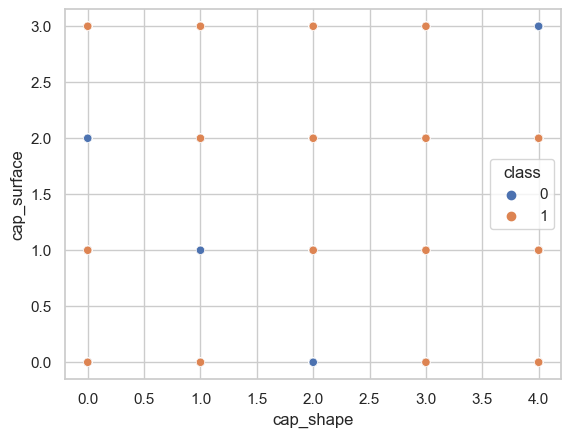

In [58]:
# Scatter plot for selected features
sns.scatterplot(data=df, x='cap_shape', y='cap_surface', hue='class')
plt.show()


### 2.	Visualize class distributions to gauge dataset balance or imbalance

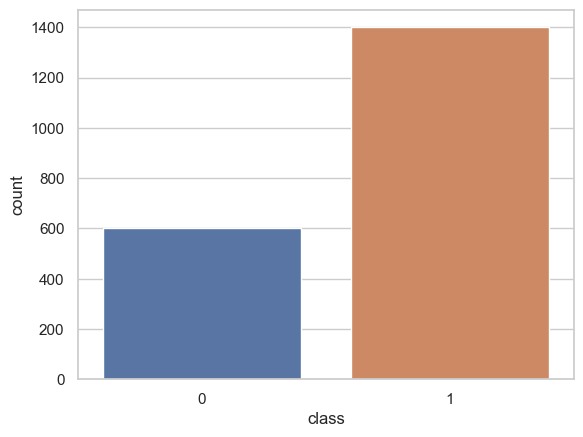

In [59]:
# Plot the class distribution
sns.countplot(x='class', data=df)
plt.show()

## _Task 4: SVM Implementation_

### 1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

In [60]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

In [61]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the SVM model on the training data
svm_classifier.fit(x_train, y_train)


SVC()

### Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [62]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the labels of the test set
y_pred = svm_classifier.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.835
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       120
           1       0.81      1.00      0.89       280

    accuracy                           0.83       400
   macro avg       0.90      0.72      0.76       400
weighted avg       0.87      0.83      0.81       400



## _Task 5: Visualization of SVM Results_

### 1.	Visualize classification results on the testing data.

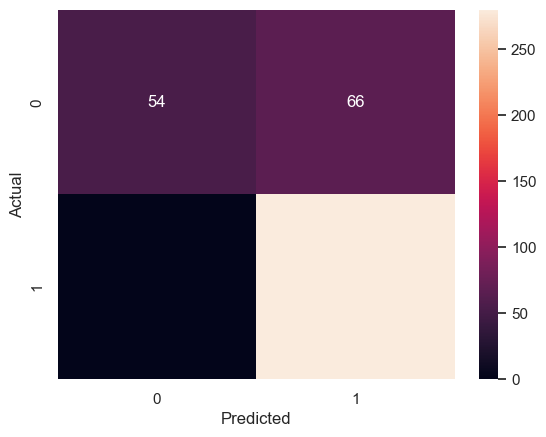

In [63]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='rocket')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## _Task 6: Parameter Tuning and Optimization_

### 1.	Experiment with different SVM hyperparameters 

In [64]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(x_train, y_train)

# Display the best parameters
print("Best parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.5s
[CV] END .........................C=0.1, gamma=

## _Task 7: Comparison and Analysis_

### 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [66]:
# Evaluate the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

print("Accuracy with best parameters:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Accuracy with best parameters: 0.8825
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       120
           1       0.86      1.00      0.92       280

    accuracy                           0.88       400
   macro avg       0.93      0.80      0.84       400
weighted avg       0.90      0.88      0.87       400



In [68]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

# Train the SVM models on the training data
svm_linear.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

# Predict the labels of the test set for each model
y_pred_linear = svm_linear.predict(x_test)
y_pred_poly = svm_poly.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print("Linear Kernel Accuracy:", accuracy_linear)
print("Polynomial Kernel Accuracy:", accuracy_poly)
print("RBF Kernel Accuracy:", accuracy_rbf)

print("\nClassification Report for Linear Kernel:\n", classification_report(y_test, y_pred_linear))
print("\nClassification Report for Polynomial Kernel:\n", classification_report(y_test, y_pred_poly))
print("\nClassification Report for RBF Kernel:\n", classification_report(y_test, y_pred_rbf))


Linear Kernel Accuracy: 0.8875
Polynomial Kernel Accuracy: 0.88
RBF Kernel Accuracy: 0.835

Classification Report for Linear Kernel:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79       120
           1       0.89      0.96      0.92       280

    accuracy                           0.89       400
   macro avg       0.89      0.84      0.86       400
weighted avg       0.89      0.89      0.88       400


Classification Report for Polynomial Kernel:
               precision    recall  f1-score   support

           0       0.97      0.62      0.76       120
           1       0.86      0.99      0.92       280

    accuracy                           0.88       400
   macro avg       0.92      0.80      0.84       400
weighted avg       0.89      0.88      0.87       400


Classification Report for RBF Kernel:
               precision    recall  f1-score   support

           0       1.00      0.45      0.62       120
           1    

###  2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

#### Strengths:

Linear Kernel:

Suitable for linearly separable data.

Faster to train and evaluate.

Performs well if the data has a linear decision boundary.

Polynomial Kernel:

Can capture more complex relationships compared to the linear kernel.

Useful if the decision boundary is polynomial

RBF Kernel

Very powerful for non-linear data.

Can capture intricate relationships in the data
.
Typically provides the best performance in terms of accuracy..

#### Weaknesses:

Linear Kernel:

Not suitable for non-linearly separable data

Polynomial Kernel:

Can lead to overfitting if the degree is too high
.
More computationally expensive than the linear kerne

RBF Kernel:

Computationally expensive and requires more time to train

.
Sensitive to the choice of hyperparameters (e.g., gamma and C).l.
.

### 3.	Discuss practical implications of SVM in real-world classification tasks.

SVMs are widely used in various real-world applications due to their effectiveness in classification tasks. Some practical implications include:
#### Text Classification:

SVMs are used in spam detection, sentiment analysis, and document classification.


Their ability to handle high-dimensional data makes them suitable for text-based applications.

#### Bioinformatics:

Used for protein classification, gene expression analysis, and other biological data classifications.


#### Finance:

Employed in fraud detection, risk assessment, and credit scoring.


